#DS recruitment evaluations - Case Study
#Name -  susara jayaweera patabendige
**Problem: Develop a Model to Predict Food Type Given the Name of a Food Item**

**Technical Approach:**

**(1) Data Preprocessing and Feature Engineering with Missing Value Handling:**
Begin by loading the dataset and performing essential data preprocessing steps. Handle any missing values through appropriate techniques such as imputation or removal. Feature engineering might involve extracting relevant information from the food item names, like item length or keywords.

**(2) Study About Dataset by Visualization Techniques:**
Utilize data visualization techniques such as bar charts, histograms, and pie charts to gain insights into the distribution of food types and the characteristics of the dataset. This analysis helps understand class imbalances and potential patterns.

**(3) Duplicate Handling and Text Analysis:**
Identify and handle duplicate values in the 'itemname' column. Implement text analysis techniques, including text preprocessing, to clean and tokenize the food item names. This involves tasks like removing special characters, stemming, and transforming text to lowercase. Additionally, explore the use of natural language processing tools like NLTK or spaCy.

**(4) Building Prediction Models:**
- **(4.i) Supervised Learning Model Using Given Dataset:**
Choose appropriate supervised learning algorithms such as Support Vector Machines (SVM), Naive Bayes,Random Forest and DNN. Split the dataset into training and testing sets. Train the model on the training set and evaluate its performance on the testing set using classification metrics like accuracy, precision, recall, and F1-score.

- **(4.ii) Supervised Learning Model Using Developed Dataset:**
After text analysis and preprocessing, create a new dataset with transformed features. Reapply the chosen supervised learning algorithms on this dataset. Compare the performance of the models trained on the original and transformed datasets.

**(5) Model Evaluation:**
Assess the accuracy and performance of the developed models using appropriate evaluation metrics. The accuracy metric provides an overview of the model's overall correctness in predictions. Additionally, consider metrics such as precision, recall, and F1-score to gain insights into the model's ability to handle false positives and false negatives.

By systematically implementing these technical steps, the problem of predicting food types based on food item names can be effectively addressed. This approach combines data preprocessing, exploratory data analysis, text analysis, and model building to create accurate prediction models.

#Import data set and check about missing values

In [ ]:
import pandas as pd
import chardet

# Define the file path
fileName = '/content/drive/MyDrive/MDA/dataset_usecase2.csv'

# Detect the encoding using chardet
with open(fileName, 'rb') as f:
    result = chardet.detect(f.read())

# Read input CSV using the detected encoding
df = pd.read_csv(fileName, encoding=result['encoding'])

# Display information about the DataFrame
df.info(verbose=True)
print(df.head(50))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15784 non-null  object
 1   itemname    15784 non-null  object
 2   tag         15780 non-null  object
dtypes: object(3)
memory usage: 370.1+ KB
   Unnamed: 0                                      itemname         tag
0           0                               Biscuit Pudding    Desserts
1          14                           Jelly Yoghurt 425ml    Desserts
2          16                        (3) Jelly Yoghurt 80ml    Desserts
3          17                              Watalappam 425ml    Desserts
4          19                           Two Chocolate Balls    Desserts
5          26                 Two Chocolate Cupcakes Medium       Cakes
6          28                       Chocolate Cupcake Large       Cakes
7          32                       Two Chocolate Triangles       Cakes
8 

In [ ]:
import pandas as pd

# Load your dataset
data = df
# Count missing values in each column
missing_values = data.isna().sum()

# Display the count of missing values for each column
print(missing_values)

total_missing_values = missing_values.sum()

print("Total number of missing values:", total_missing_values)


Unnamed: 0    0
itemname      0
tag           4
dtype: int64
Total number of missing values: 4


#Remove missing values

In [ ]:
# Remove rows with missing values
data_without_missing = data.dropna()

# Save the resulting dataset without missing values
data_without_missing.to_csv("cleaned_dataset.csv", index=False)

#create as new data set

In [ ]:

import pandas as pd
import chardet

# Define the file path
fileName = '/content/cleaned_dataset.csv'

# Detect the encoding using chardet
with open(fileName, 'rb') as f:
    result = chardet.detect(f.read())

# Read input CSV using the detected encoding
df = pd.read_csv(fileName, encoding=result['encoding'])

# Display information about the DataFrame
df.info(verbose=True)
print(df.head(50))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15780 non-null  int64 
 1   itemname    15780 non-null  object
 2   tag         15780 non-null  object
dtypes: int64(1), object(2)
memory usage: 370.0+ KB
    Unnamed: 0                                      itemname         tag
0            0                               Biscuit Pudding    Desserts
1           14                           Jelly Yoghurt 425ml    Desserts
2           16                        (3) Jelly Yoghurt 80ml    Desserts
3           17                              Watalappam 425ml    Desserts
4           19                           Two Chocolate Balls    Desserts
5           26                 Two Chocolate Cupcakes Medium       Cakes
6           28                       Chocolate Cupcake Large       Cakes
7           32                       Two Chocolate Trian

# Remove duplicates from the "itemname" column

In [ ]:
import pandas as pd
import chardet

# Define the file path
fileName = '/content/cleaned_dataset.csv'

# Detect the encoding using chardet
with open(fileName, 'rb') as f:
    result = chardet.detect(f.read())

# Read input CSV using the detected encoding
df = pd.read_csv(fileName, encoding=result['encoding'])

# Remove duplicates from the "itemname" column
df['itemname'] = df['itemname'].drop_duplicates()

# Display information about the DataFrame
df.info(verbose=True)
print(df.head(50))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15780 non-null  int64 
 1   itemname    15059 non-null  object
 2   tag         15780 non-null  object
dtypes: int64(1), object(2)
memory usage: 370.0+ KB
    Unnamed: 0                                      itemname         tag
0            0                               Biscuit Pudding    Desserts
1           14                           Jelly Yoghurt 425ml    Desserts
2           16                        (3) Jelly Yoghurt 80ml    Desserts
3           17                              Watalappam 425ml    Desserts
4           19                           Two Chocolate Balls    Desserts
5           26                 Two Chocolate Cupcakes Medium       Cakes
6           28                       Chocolate Cupcake Large       Cakes
7           32                       Two Chocolate Trian

#Identifying Dataset Behavior

Upon visualizing the dataset through bar and pie charts, it becomes evident that the dataset is not uniformly distributed with regards to the distribution of tags. These visualizations highlight that certain tags exhibit considerably lower frequency counts in comparison to others. This uneven distribution indicates an inherent class imbalance within the dataset.

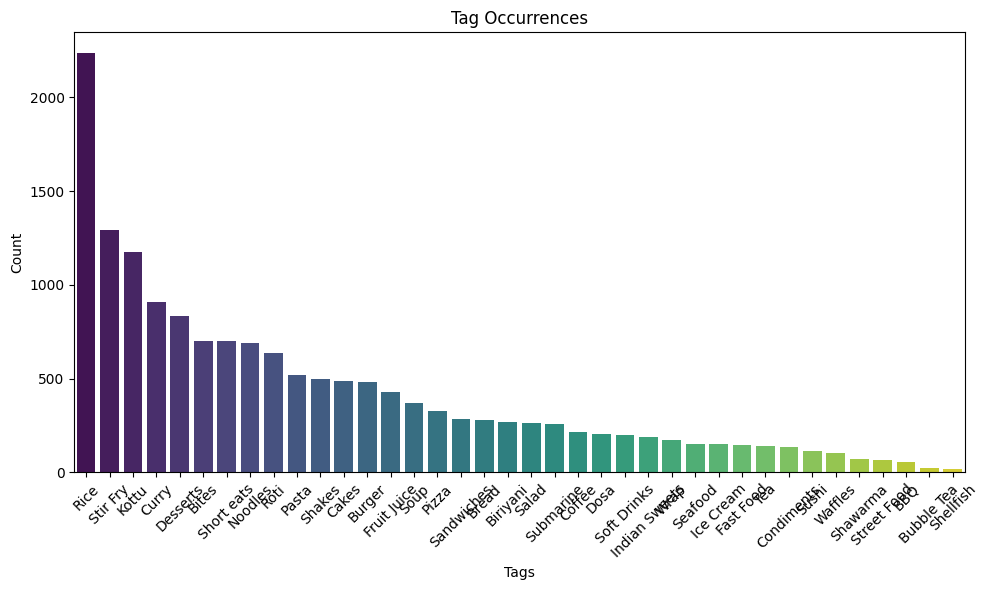

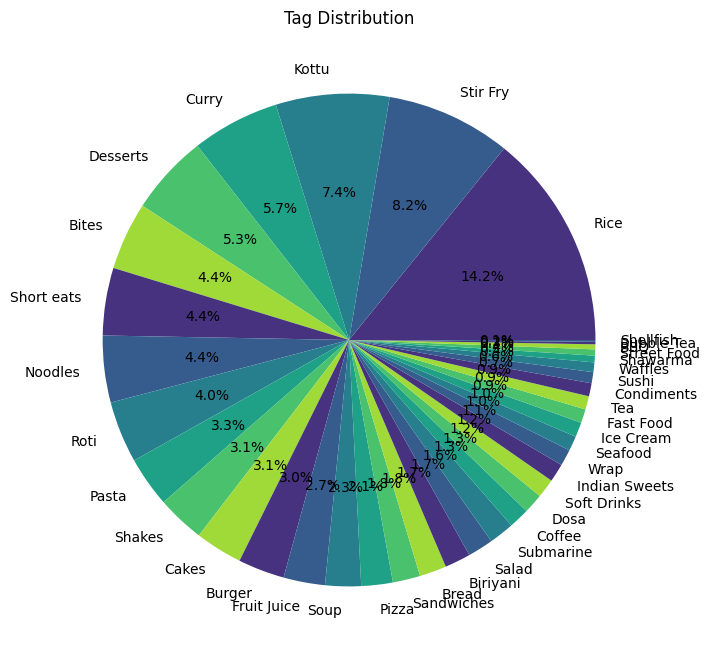

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each tag
tag_counts = df['tag'].value_counts()

# Plot a bar chart of tag occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.title("Tag Occurrences")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot a pie chart of tag occurrences
plt.figure(figsize=(8, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("Tag Distribution")
plt.show()


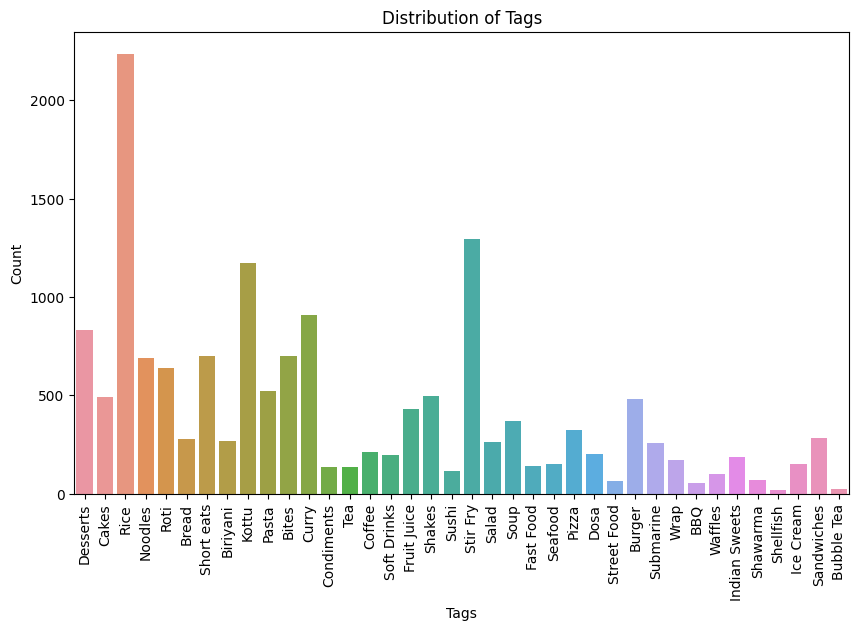

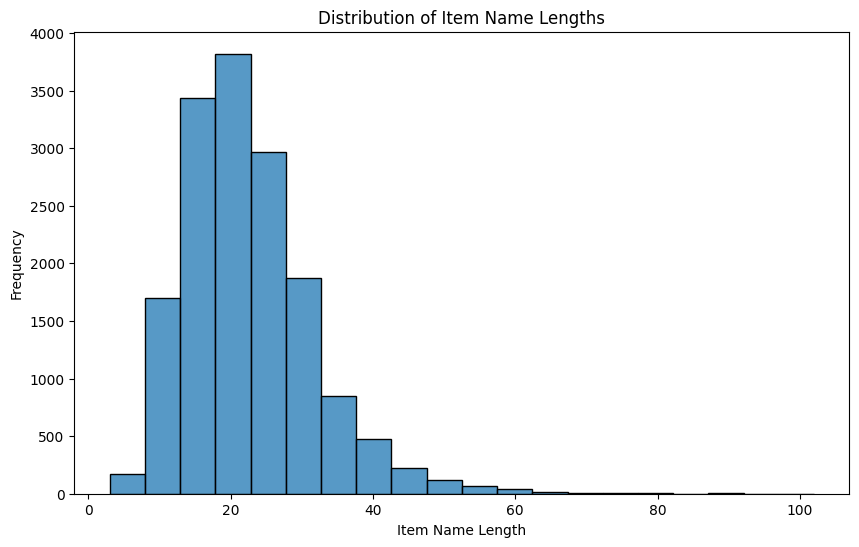

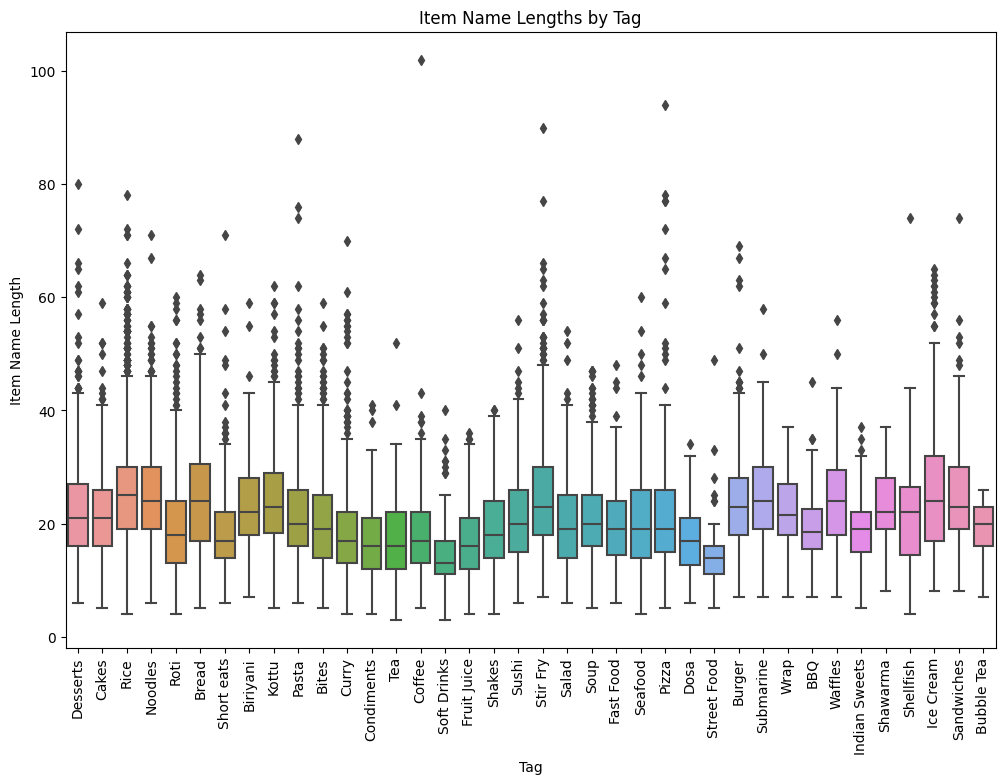

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = df

# Count of each tag
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='tag')
plt.xticks(rotation=90)
plt.title('Distribution of Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

# Distribution of itemname lengths
data['itemname_length'] = data['itemname'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='itemname_length', bins=20)
plt.title('Distribution of Item Name Lengths')
plt.xlabel('Item Name Length')
plt.ylabel('Frequency')
plt.show()

# Box plot of itemname lengths by tag
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='tag', y='itemname_length')
plt.xticks(rotation=90)
plt.title('Item Name Lengths by Tag')
plt.xlabel('Tag')
plt.ylabel('Item Name Length')
plt.show()



In [ ]:
!pip install nltk


#(A) Consequently, two distinct approaches are suggested for handling this class imbalance:

### (1) Utilizing the Original Dataset
In this approach, the dataset is used in its existing state without any modifications. While this method allows for a direct examination of the model's performance on the natural distribution of the data, it may be susceptible to imbalanced class effects that could lead to the model favoring the majority classes.

### (2) Utilizing a Balanced Dataset
Alternatively, the dataset can be balanced to rectify the class imbalance. This process involves equalizing the representation of each tag category, enabling the model to be trained and evaluated under more equitable conditions. Normalizing the dataset mitigates the potential bias introduced by imbalanced classes, fostering better generalization and more accurate prediction results.

#(B) Item length
Given the variable lengths of food item names in the dataset, it is necessary to apply data preprocessing techniques using text analysis. The inherent variability in the length of text entries introduces challenges when directly inputting the data into machine learning models. Text analysis methods are required to standardize and transform the textual content into a structured format that can be effectively processed by the subsequent steps of the analysis pipeline. By utilizing text analysis techniques, such as tokenization, stemming, and removal of stopwords, the dataset's textual features will be converted into a consistent format, allowing for more accurate and meaningful representation within the model training and evaluation processes. This preprocessing step is integral to ensuring that the model can effectively extract relevant patterns and insights from the text data, ultimately contributing to improved classification performance and more reliable predictions.

# (B) Text analysis part
###1. Remove Special Characters
 This step involves using regular expressions to remove any characters that are not letters or spaces. Special characters, punctuation, and symbols are eliminated to focus only on the text content.

###2. Remove Numbers
 Similar to the previous step, this step utilizes regular expressions to remove numeric digits from the text. Numbers are often not relevant for certain text analysis tasks.

###3. Expand Contractions
  This helps in treating expanded contractions as separate words and aids in better analysis.

###4. Tokenization
  The text is split into individual words or tokens. This process breaks down the text into smaller components, making it easier to process and analyze.

###5. Convert to Lowercase
  All words are converted to lowercase. This ensures consistency in word representations, as "Word" and "word" are treated as the same.

###6. Remove Empty Tokens
  Any tokens that are left empty after the previous steps are removed. This can happen if multiple special characters are adjacent, or if a word is entirely composed of symbols.

###7. Remove Stopwords
  Stopwords are common words like "the," "is," "in," etc., that don't contribute much to the meaning of the text. They are removed to reduce noise and improve the efficiency of analysis.

###8. Remove Repeated Characters
  Repeated characters within words are reduced to two instances. For example, "Bunnn" becomes "bun." This helps standardize variations of the same word.

###9. Stemming
  Stemming reduces words to their base or root form. For instance, "buying" and "buy" are stemmed to "run." This reduces the dimensionality of the data by considering variations of words as a single entity.

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from contractions import contractions_dict  # Assuming you have the contractions dictionary

# Load your dataset
data = df
food_names = data['itemname']
tags = data['tag']

# Data preprocessing
def preprocess_text(text):
    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Expanding contractions
    words = text.split()
    expanded_words = [contractions_dict[word] if word in contractions_dict else word for word in words]
    text = ' '.join(expanded_words)

    # Tokenizing into words
    words = nltk.word_tokenize(text)

    # Converting to lowercase
    words = [word.lower() for word in words]

    # Removing empty tokens
    words = [word for word in words if word]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Removing repeated characters
    words = [re.sub(r'(.)\1+', r'\1\1', word) for word in words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Apply preprocessing to each item name
preprocessed_food_names = [preprocess_text(name) for name in food_names]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(preprocessed_food_names, tags, test_size=0.2, random_state=42)

# Count Vectorization with n-grams (1, 1)
count_vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=1000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Convert features to a dense matrix
X_train_count_dense = X_train_count.toarray()
X_test_count_dense = X_test_count.toarray()


### example - Cleaned item set

In [ ]:

print(preprocessed_food_names[5])

two chocol cupcak medium


###example vector

In [ ]:
print(X_train_count_dense[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from contractions import contractions_dict
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


#(A)- 1 - (1) SVM



In [ ]:

# Model training and hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
classifier = SVC()
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_count_dense, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Model evaluation
y_pred = best_classifier.predict(X_test_count_dense)
print(classification_report(y_test, y_pred))



               precision    recall  f1-score   support

          BBQ       0.62      0.71      0.67         7
     Biriyani       0.87      0.93      0.90        43
        Bites       0.55      0.61      0.58       153
        Bread       0.86      0.67      0.75        45
   Bubble Tea       1.00      1.00      1.00         6
       Burger       0.96      0.86      0.90        99
        Cakes       0.83      0.84      0.83       107
       Coffee       0.73      0.82      0.78        40
   Condiments       0.61      0.52      0.56        27
        Curry       0.69      0.81      0.74       189
     Desserts       0.49      0.78      0.60       149
         Dosa       0.94      0.94      0.94        35
    Fast Food       0.50      0.25      0.33        24
  Fruit Juice       0.84      0.80      0.82       104
    Ice Cream       0.96      0.69      0.81        36
Indian Sweets       0.89      0.68      0.77        37
        Kottu       0.98      0.99      0.98       220
      Noo

# (A)- 1 - (2) - Naive Bayes Classifier


In [ ]:
# Naive Bayes Classifier with Hyperparameter Tuning
nb_param_grid = {'alpha': [0.1, 0.5, 1.0]}
nb_grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=nb_param_grid, cv=3, n_jobs=-1)
nb_grid_search.fit(X_train_count_dense, y_train)
best_nb_classifier = nb_grid_search.best_estimator_
y_pred_nb = best_nb_classifier.predict(X_test_count_dense)
print("Best Naive Bayes Classifier:")
print(best_nb_classifier)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Best Naive Bayes Classifier:
MultinomialNB(alpha=0.1)
Naive Bayes Classification Report:
               precision    recall  f1-score   support

          BBQ       0.83      0.71      0.77         7
     Biriyani       0.85      0.93      0.89        43
        Bites       0.66      0.45      0.53       153
        Bread       0.83      0.67      0.74        45
   Bubble Tea       0.83      0.83      0.83         6
       Burger       0.87      0.86      0.86        99
        Cakes       0.80      0.85      0.82       107
       Coffee       0.78      0.80      0.79        40
   Condiments       0.61      0.41      0.49        27
        Curry       0.81      0.66      0.73       189
     Desserts       0.74      0.70      0.72       149
         Dosa       0.82      0.94      0.88        35
    Fast Food       0.53      0.33      0.41        24
  Fruit Juice       0.75      0.83      0.79       104
    Ice Cream       0.86      0.69      0.77        36
Indian Sweets       0.78      

#(A)- 1 - (2) Random Forest Classifier

In [ ]:
# Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_count_dense, y_train)
best_rf_classifier = rf_grid_search.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test_count_dense)
print("Best Random Forest Classifier:")
print(best_rf_classifier)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest Classifier:
RandomForestClassifier(n_estimators=200, random_state=42)
Random Forest Classification Report:
               precision    recall  f1-score   support

          BBQ       0.62      0.71      0.67         7
     Biriyani       0.87      0.91      0.89        43
        Bites       0.55      0.48      0.51       153
        Bread       0.84      0.58      0.68        45
   Bubble Tea       0.80      0.67      0.73         6
       Burger       0.90      0.86      0.88        99
        Cakes       0.77      0.83      0.80       107
       Coffee       0.69      0.72      0.71        40
   Condiments       0.48      0.56      0.52        27
        Curry       0.61      0.74      0.67       189
     Desserts       0.50      0.67      0.57       149
         Dosa       0.94      0.94      0.94        35
    Fast Food       0.44      0.46      0.45        24
  Fruit Juice       0.69      0.76      0.72       104
    Ice Cream       0.89      0.47      0.62    

#(A)- 1 - (3) K-Nearest Neighbors Classifier

In [ ]:
# K-Nearest Neighbors Classifier with Hyperparameter Tuning
knn_param_grid = {'n_neighbors': [3, 5, 7,10]}
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=3, n_jobs=-1)
knn_grid_search.fit(X_train_count_dense, y_train)
best_knn_classifier = knn_grid_search.best_estimator_
y_pred_knn = best_knn_classifier.predict(X_test_count_dense)
print("Best K-Nearest Neighbors Classifier:")
print(best_knn_classifier)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Best K-Nearest Neighbors Classifier:
KNeighborsClassifier(n_neighbors=7)
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

          BBQ       0.29      0.57      0.38         7
     Biriyani       0.74      0.79      0.76        43
        Bites       0.35      0.48      0.40       153
        Bread       0.85      0.64      0.73        45
   Bubble Tea       0.50      0.33      0.40         6
       Burger       0.91      0.84      0.87        99
        Cakes       0.81      0.81      0.81       107
       Coffee       0.59      0.75      0.66        40
   Condiments       0.24      0.33      0.28        27
        Curry       0.42      0.71      0.53       189
     Desserts       0.53      0.68      0.60       149
         Dosa       0.91      0.86      0.88        35
    Fast Food       0.47      0.29      0.36        24
  Fruit Juice       0.63      0.72      0.67       104
    Ice Cream       0.70      0.39      0.50        36
Ind

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#(A)- 1 - (5) - DNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

# Load your dataset
data = df
food_names = data['itemname']
tags = data['tag']

# Data preprocessing
cleaned_food_names = [name.lower() for name in food_names]  # Convert to lowercase

# Encode tags
label_encoder = LabelEncoder()
encoded_tags = label_encoder.fit_transform(tags)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(cleaned_food_names, encoded_tags, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenization and padding
max_words = 1000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Build the DNN model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=20, batch_size=32, validation_data=(X_val_padded, y_val))

# Evaluate the model
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

num_classes = len(label_encoder.classes_)
print("Number of classes in label_encoder:", num_classes)

target_names = label_encoder.inverse_transform(range(num_classes))

# Create a dictionary to map encoded tags back to their original names
encoded_to_original = {i: label_encoder.inverse_transform([i])[0] for i in range(num_classes)}

# Map y_test and y_pred back to original tag names
y_test_original = [encoded_to_original[encoded_tag] for encoded_tag in y_test]
y_pred_original = [encoded_to_original[encoded_tag] for encoded_tag in y_pred]

print(classification_report(y_test_original, y_pred_original))


Epoch 1/20
346/346 [==============================] - 4s 9ms/step - loss: 2.7415 - accuracy: 0.2925 - val_loss: 1.8632 - val_accuracy: 0.5688
Epoch 2/20
346/346 [==============================] - 3s 8ms/step - loss: 1.4291 - accuracy: 0.6440 - val_loss: 1.0695 - val_accuracy: 0.7441
Epoch 3/20
346/346 [==============================] - 3s 8ms/step - loss: 0.9482 - accuracy: 0.7659 - val_loss: 0.8707 - val_accuracy: 0.7859
Epoch 4/20
346/346 [==============================] - 2s 5ms/step - loss: 0.7634 - accuracy: 0.8058 - val_loss: 0.8020 - val_accuracy: 0.7977
Epoch 5/20
346/346 [==============================] - 2s 5ms/step - loss: 0.6550 - accuracy: 0.8278 - val_loss: 0.7716 - val_accuracy: 0.8062
Epoch 6/20
346/346 [==============================] - 2s 5ms/step - loss: 0.5964 - accuracy: 0.8401 - val_loss: 0.7643 - val_accuracy: 0.8036
Epoch 7/20
346/346 [==============================] - 2s 5ms/step - loss: 0.5479 - accuracy: 0.8537 - val_loss: 0.7552 - val_accuracy: 0.8125
Epoch 

#(A) - (2) Utilizing a Balanced Dataset

###(A) - (2) - (i) -  Take 400 data from each tags and add repeated random values for remaining tags



In [ ]:
import pandas as pd
from collections import Counter
import random

# Load your dataset
data = df
# minimum number of samples per tag
min_samples_per_tag = 400

# Count the occurrences of each tag
tag_counts = Counter(data['tag'].dropna())

# Create an empty DataFrame to store the balanced data
balanced_data = pd.DataFrame(columns=data.columns)

# Sample an equal number of samples from each selected tag category
for tag, count in tag_counts.items():
    if count >= min_samples_per_tag:
        tag_samples = data[data['tag'] == tag].sample(min_samples_per_tag, random_state=42)
        balanced_data = balanced_data.append(tag_samples, ignore_index=True)
    else:
        # Repeat samples from random samples for tags with counts below min_samples_per_tag
        random_samples = data[data['tag'] == tag].sample(min_samples_per_tag - count, replace=True, random_state=42)
        repeated_samples = pd.concat([data[data['tag'] == tag], random_samples], ignore_index=True)
        balanced_data = balanced_data.append(repeated_samples, ignore_index=True)

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data)


<ipython-input-73-812bb85a0a00>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(tag_samples, ignore_index=True)
<ipython-input-73-812bb85a0a00>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(repeated_samples, ignore_index=True)


      Unnamed: 0                              itemname          tag
0           2097                Roast Chicken Biriyani     Biriyani
1          18286               Pasta Chicken Carbonara        Pasta
2           9178                  Fish Roast Pan Kottu        Kottu
3          15637                         Dhal Vada (4)  Street Food
4          10803                 Devilled Beef Portion     Stir Fry
...          ...                                   ...          ...
15195      20404                     Umbalakada Sambal   Condiments
15196      48538                         Mini Shawarma     Shawarma
15197     149462          Supreme Ceylon Single Origin          Tea
15198      52435  Special Mix Chopsuey Rice or Noodles         Rice
15199      23393     Cream Cheese & Cucumber Hoso Maki        Sushi

[15200 rows x 3 columns]


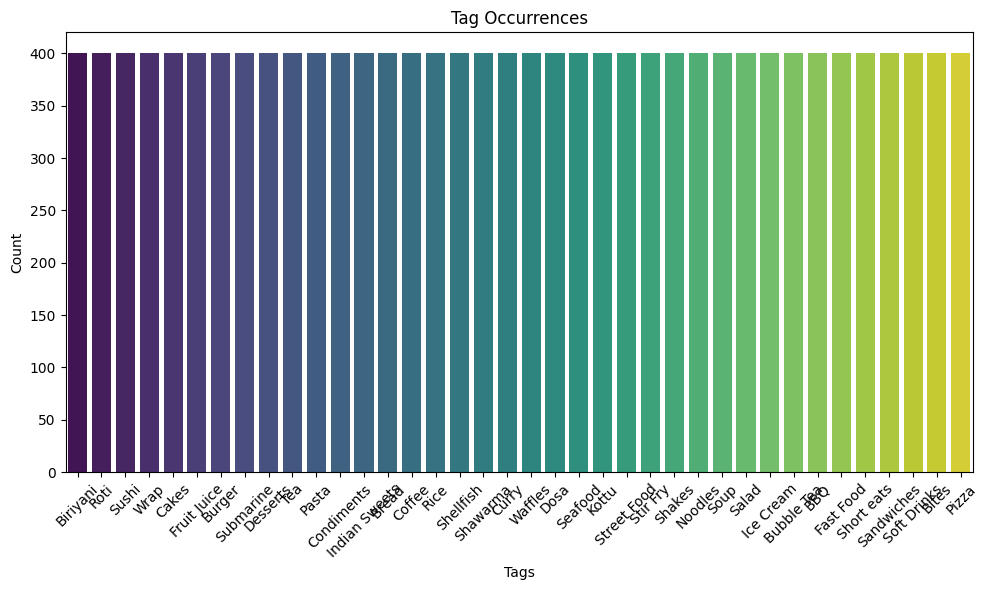

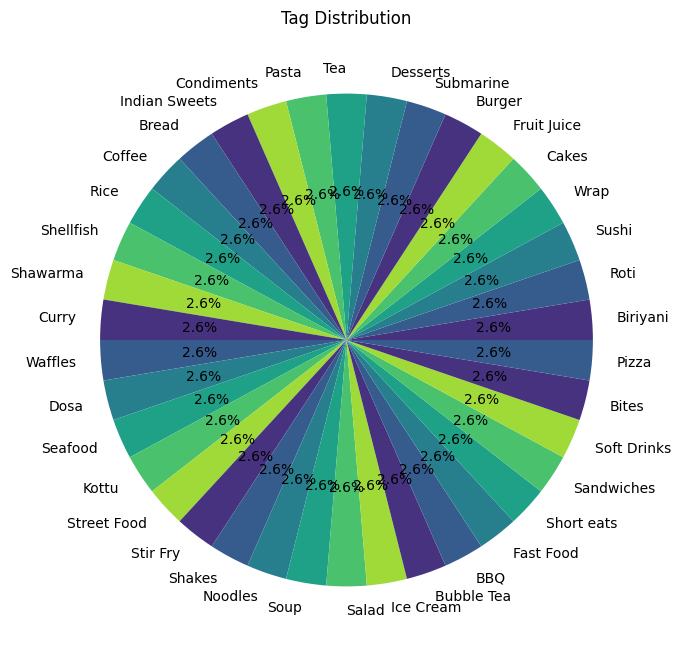

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each tag
tag_counts = balanced_data['tag'].value_counts()

# Plot a bar chart of tag occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.title("Tag Occurrences")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot a pie chart of tag occurrences
plt.figure(figsize=(8, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("Tag Distribution")
plt.show()


#####(A) - (2) - (i) - DNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

# Load your dataset
data = balanced_data
food_names = data['itemname']
tags = data['tag']

# Data preprocessing
cleaned_food_names = [name.lower() for name in food_names]  # Convert to lowercase

# Encode tags
label_encoder = LabelEncoder()
encoded_tags = label_encoder.fit_transform(tags)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(cleaned_food_names, encoded_tags, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenization and padding
max_words = 1000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Build the DNN model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_val_padded, y_val))

# Evaluate the model
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

num_classes = len(label_encoder.classes_)
print("Number of classes in label_encoder:", num_classes)

target_names = label_encoder.inverse_transform(range(num_classes))

# Create a dictionary to map encoded tags back to their original names
encoded_to_original = {i: label_encoder.inverse_transform([i])[0] for i in range(num_classes)}

# Map y_test and y_pred back to original tag names
y_test_original = [encoded_to_original[encoded_tag] for encoded_tag in y_test]
y_pred_original = [encoded_to_original[encoded_tag] for encoded_tag in y_pred]

print(classification_report(y_test_original, y_pred_original))


Epoch 1/10
333/333 [==============================] - 4s 10ms/step - loss: 3.0980 - accuracy: 0.2496 - val_loss: 1.7272 - val_accuracy: 0.6820
Epoch 2/10
333/333 [==============================] - 2s 6ms/step - loss: 1.2596 - accuracy: 0.6925 - val_loss: 0.8287 - val_accuracy: 0.8035
Epoch 3/10
333/333 [==============================] - 2s 5ms/step - loss: 0.7779 - accuracy: 0.8066 - val_loss: 0.6614 - val_accuracy: 0.8259
Epoch 4/10
333/333 [==============================] - 2s 6ms/step - loss: 0.6213 - accuracy: 0.8426 - val_loss: 0.5988 - val_accuracy: 0.8425
Epoch 5/10
333/333 [==============================] - 3s 9ms/step - loss: 0.5399 - accuracy: 0.8607 - val_loss: 0.5673 - val_accuracy: 0.8487
Epoch 6/10
333/333 [==============================] - 2s 5ms/step - loss: 0.4936 - accuracy: 0.8695 - val_loss: 0.5535 - val_accuracy: 0.8491
Epoch 7/10
333/333 [==============================] - 2s 5ms/step - loss: 0.4429 - accuracy: 0.8805 - val_loss: 0.5610 - val_accuracy: 0.8474
Epoch

###(A) - (2) - (ii) -  According to count of each tag, Sample data to ensure each tag has at least 400 samples

In [ ]:
import pandas as pd
from collections import Counter
import random

# Load your dataset
data = df
# Determine the desired total number of samples (you can adjust this value)
total_samples = 15000

# Count the occurrences of each tag
tag_counts = Counter(data['tag'].dropna())

# Calculate weight for each tag based on their count
total_count = sum(tag_counts.values())
tag_weights = {tag: count / total_count for tag, count in tag_counts.items()}

# Create an empty DataFrame to store the balanced data
balanced_data = pd.DataFrame(columns=data.columns)

# Sample data to ensure each tag has at least 400 samples
for tag, weight in tag_weights.items():
    num_samples = int(total_samples * weight)
    if num_samples < 400:
        num_samples = 400
    tag_samples = data[data['tag'] == tag].sample(num_samples, replace=True, random_state=42)
    balanced_data = balanced_data.append(tag_samples, ignore_index=True)

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now you have a balanced dataset with each tag having at least 400 samples in the "balanced_data" DataFrame
print(balanced_data)


<ipython-input-4-a7a1f4ab0955>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(tag_samples, ignore_index=True)


      Unnamed: 0                            itemname          tag
0          46649              Mocha Cream Cheese (6)     Desserts
1          29590     BBQ Jumbo Chicken Double Hotdog   Short eats
2          19170                  Chicken Sub Cheese    Submarine
3          55639          (4) Paratha with Mix Gravy         Roti
4          60984                  Tandooori Shawarma     Shawarma
...          ...                                 ...          ...
20604       9542  Hazel Nut with Chocolate Milkshake       Shakes
20605      16430                Prawn Mix Sushi Roll        Sushi
20606        501                          Curd Vadai   Short eats
20607       9336         Ribbon Cake 3Lb (Serves 30)        Cakes
20608     169314                  Chicken Samosa (2)  Street Food

[20609 rows x 3 columns]


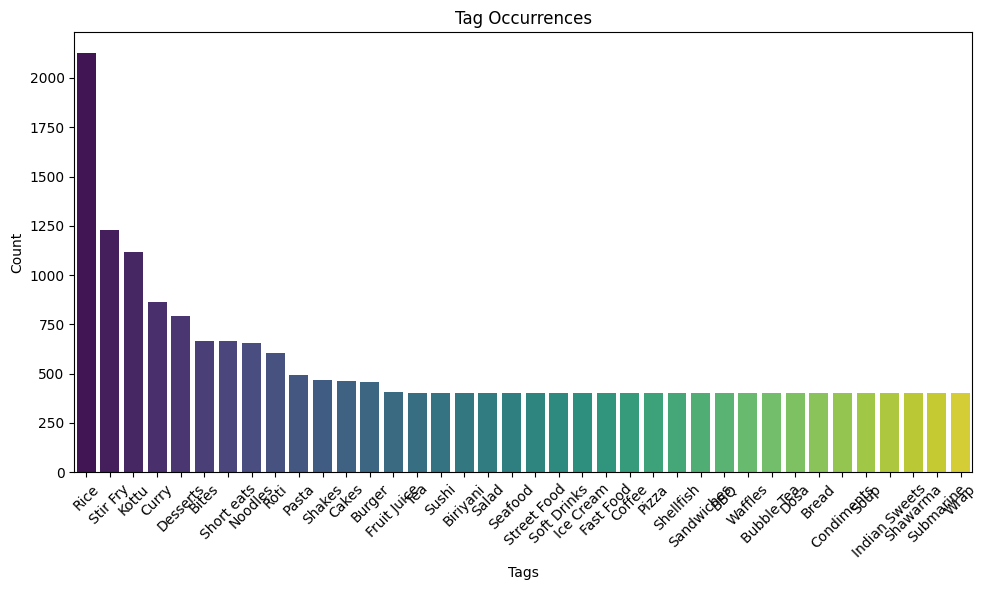

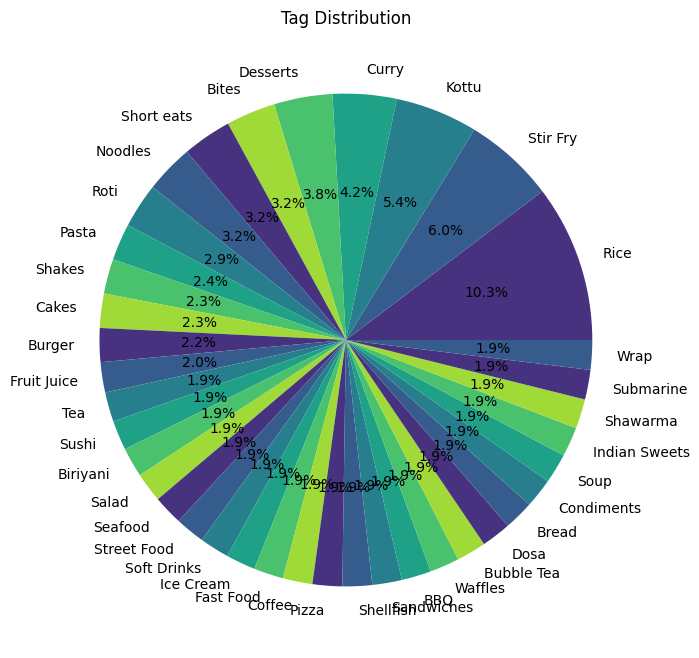

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each tag
tag_counts = balanced_data['tag'].value_counts()

# Plot a bar chart of tag occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.title("Tag Occurrences")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot a pie chart of tag occurrences
plt.figure(figsize=(8, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("Tag Distribution")
plt.show()


#####(A) - (2) - (ii) - DNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

# Load your balanced dataset
data = balanced_data
food_names = data['itemname']
tags = data['tag']

# Data preprocessing
cleaned_food_names = [name.lower() for name in food_names]  # Convert to lowercase

# Encode tags
label_encoder = LabelEncoder()
encoded_tags = label_encoder.fit_transform(tags)

# Tokenization and padding
max_words = 1000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(cleaned_food_names)

X_seq = tokenizer.texts_to_sequences(cleaned_food_names)
max_sequence_length = max([len(seq) for seq in X_seq])
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length, padding='post')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, encoded_tags, test_size=0.2, random_state=42, stratify=encoded_tags)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Build the DNN model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

num_classes = len(label_encoder.classes_)
print("Number of classes in label_encoder:", num_classes)

target_names = label_encoder.inverse_transform(range(num_classes))

# Create a dictionary to map encoded tags back to their original names
encoded_to_original = {i: label_encoder.inverse_transform([i])[0] for i in range(num_classes)}

# Map y_test and y_pred back to original tag names
y_test_original = [encoded_to_original[encoded_tag] for encoded_tag in y_test]
y_pred_original = [encoded_to_original[encoded_tag] for encoded_tag in y_pred]

print(classification_report(y_test_original, y_pred_original))


Epoch 1/50
464/464 [==============================] - 5s 8ms/step - loss: 2.7864 - accuracy: 0.2797 - val_loss: 1.4542 - val_accuracy: 0.6756
Epoch 2/50
464/464 [==============================] - 4s 8ms/step - loss: 1.0616 - accuracy: 0.7375 - val_loss: 0.6887 - val_accuracy: 0.8229
Epoch 3/50
464/464 [==============================] - 3s 5ms/step - loss: 0.6572 - accuracy: 0.8343 - val_loss: 0.5690 - val_accuracy: 0.8423
Epoch 4/50
464/464 [==============================] - 2s 4ms/step - loss: 0.5348 - accuracy: 0.8582 - val_loss: 0.5137 - val_accuracy: 0.8636
Epoch 5/50
464/464 [==============================] - 2s 4ms/step - loss: 0.4676 - accuracy: 0.8742 - val_loss: 0.4952 - val_accuracy: 0.8636
Epoch 6/50
464/464 [==============================] - 2s 5ms/step - loss: 0.4199 - accuracy: 0.8808 - val_loss: 0.4759 - val_accuracy: 0.8684
Epoch 7/50
464/464 [==============================] - 2s 4ms/step - loss: 0.3841 - accuracy: 0.8901 - val_loss: 0.4654 - val_accuracy: 0.8733
Epoch 

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from contractions import contractions_dict
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

# Load your balanced dataset
data = balanced_data
food_names = data['itemname']
tags = data['tag']

# Data preprocessing
def preprocess_text(text):
    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Expanding contractions
    words = text.split()
    expanded_words = [contractions_dict[word] if word in contractions_dict else word for word in words]
    text = ' '.join(expanded_words)

    # Tokenizing into words
    words = nltk.word_tokenize(text)

    # Converting to lowercase
    words = [word.lower() for word in words]

    # Removing empty tokens
    words = [word for word in words if word]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Removing repeated characters
    words = [re.sub(r'(.)\1+', r'\1\1', word) for word in words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Apply preprocessing to each item name
preprocessed_food_names = [preprocess_text(name) for name in food_names]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(preprocessed_food_names, tags, test_size=0.2, random_state=42)

# Count Vectorization with n-grams (1, 1)
count_vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=1000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Convert features to a dense matrix
X_train_count_dense = X_train_count.toarray()
X_test_count_dense = X_test_count.toarray()

# Tokenization and padding
max_words = 1000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Encode tags
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Build the DNN model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

# Map y_test_encoded and y_pred back to original tag names
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred)

print(classification_report(y_test_original, y_pred_original))


Epoch 1/50
464/464 [==============================] - 6s 9ms/step - loss: 2.6919 - accuracy: 0.2998 - val_loss: 1.3925 - val_accuracy: 0.7010
Epoch 2/50
464/464 [==============================] - 2s 5ms/step - loss: 1.0325 - accuracy: 0.7487 - val_loss: 0.7287 - val_accuracy: 0.8302
Epoch 3/50
464/464 [==============================] - 2s 4ms/step - loss: 0.6746 - accuracy: 0.8265 - val_loss: 0.5890 - val_accuracy: 0.8587
Epoch 4/50
464/464 [==============================] - 2s 4ms/step - loss: 0.5438 - accuracy: 0.8569 - val_loss: 0.5363 - val_accuracy: 0.8617
Epoch 5/50
464/464 [==============================] - 2s 4ms/step - loss: 0.4757 - accuracy: 0.8690 - val_loss: 0.5163 - val_accuracy: 0.8593
Epoch 6/50
464/464 [==============================] - 2s 4ms/step - loss: 0.4349 - accuracy: 0.8762 - val_loss: 0.4992 - val_accuracy: 0.8678
Epoch 7/50
464/464 [==============================] - 2s 5ms/step - loss: 0.4027 - accuracy: 0.8843 - val_loss: 0.4792 - val_accuracy: 0.8720
Epoch 

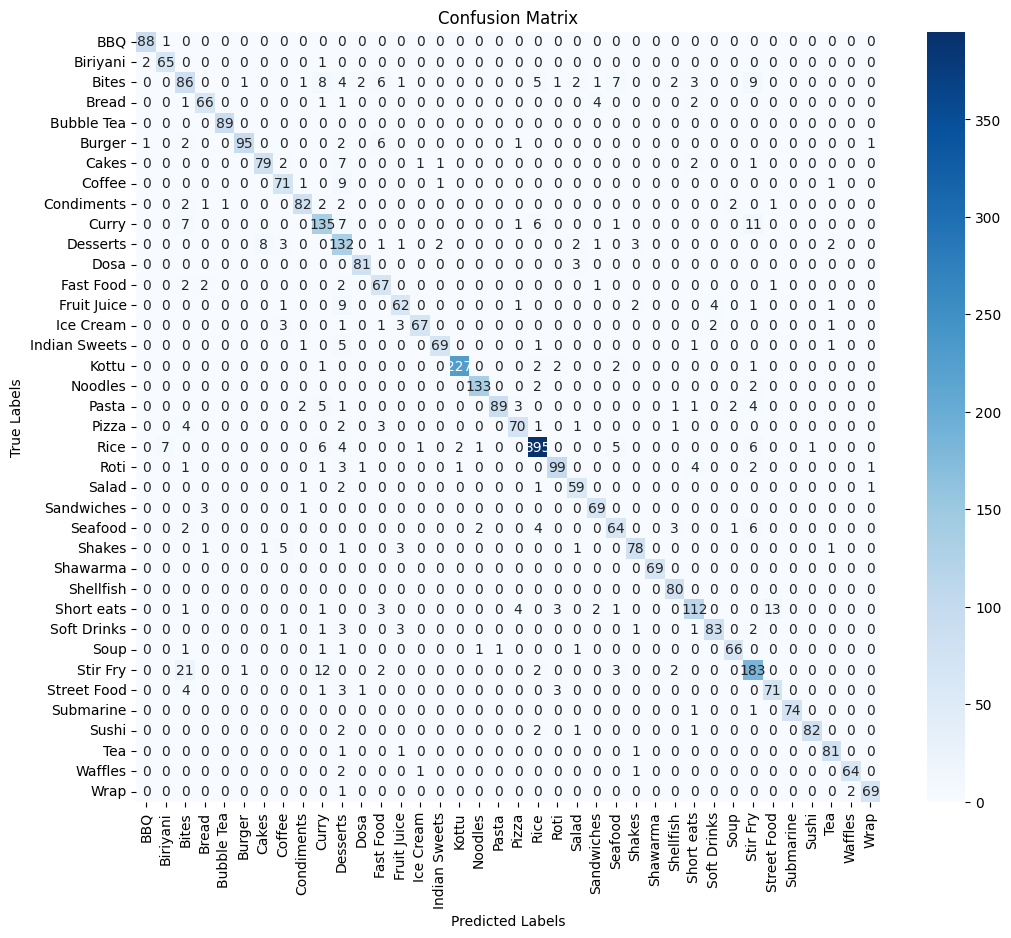

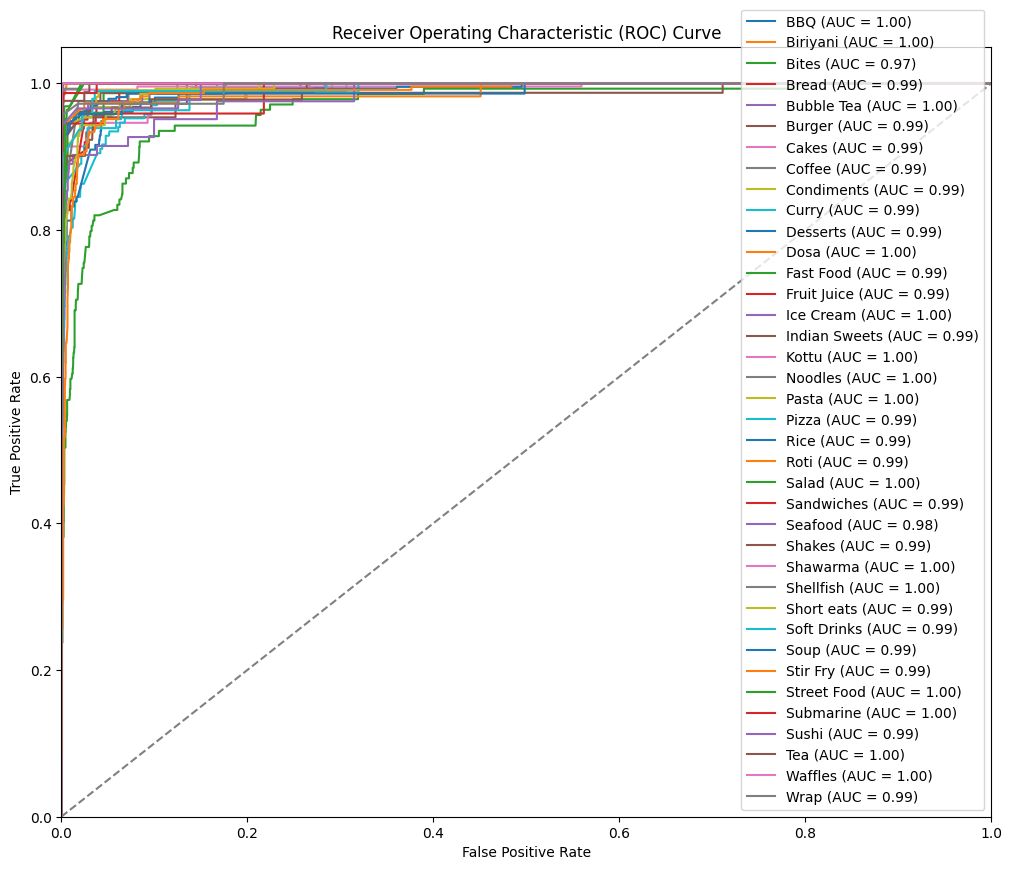

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion = confusion_matrix(y_test_original, y_pred_original, labels=label_encoder.classes_)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC for each class
plt.figure(figsize=(12, 10))
fpr = {}
tpr = {}
roc_auc = {}

for i, class_name in enumerate(label_encoder.classes_):
    y_true_class = (y_test_original == class_name).astype(int)
    y_pred_probs_class = y_pred_probs[:, i]

    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_class, y_pred_probs_class)
    roc_auc[class_name] = roc_auc_score(y_true_class, y_pred_probs_class)
    plt.plot(fpr[class_name], tpr[class_name], label=f"{class_name} (AUC = {roc_auc[class_name]:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:

# Load your balanced dataset
data = balanced_data
food_names = data['itemname']
tags = data['tag']

# Data preprocessing
def preprocess_text(text):
    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Expanding contractions
    words = text.split()
    expanded_words = [contractions_dict[word] if word in contractions_dict else word for word in words]
    text = ' '.join(expanded_words)

    # Tokenizing into words
    words = nltk.word_tokenize(text)

    # Converting to lowercase
    words = [word.lower() for word in words]

    # Removing empty tokens
    words = [word for word in words if word]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Removing repeated characters
    words = [re.sub(r'(.)\1+', r'\1\1', word) for word in words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Apply preprocessing to each item name
preprocessed_food_names = [preprocess_text(name) for name in food_names]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(preprocessed_food_names, tags, test_size=0.2, random_state=42)

# Count Vectorization with n-grams (1, 1)
count_vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=1000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Convert features to a dense matrix
X_train_count_dense = X_train_count.toarray()
X_test_count_dense = X_test_count.toarray()

# Encode tags
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Build the DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1000,)))  # Adjusted input shape
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_count_dense, y_train_encoded, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

# Save the trained model to a file
model.save("text_classification_model.h5")

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_count_dense)
y_pred = np.argmax(y_pred_probs, axis=1)

# Map y_test_encoded and y_pred back to original tag names
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred)

print(classification_report(y_test_original, y_pred_original))

Epoch 1/50
464/464 [==============================] - 3s 5ms/step - loss: 2.4252 - accuracy: 0.4538 - val_loss: 1.2436 - val_accuracy: 0.7696
Epoch 2/50
464/464 [==============================] - 2s 4ms/step - loss: 0.9787 - accuracy: 0.7932 - val_loss: 0.7503 - val_accuracy: 0.8423
Epoch 3/50
464/464 [==============================] - 3s 5ms/step - loss: 0.6859 - accuracy: 0.8359 - val_loss: 0.6158 - val_accuracy: 0.8575
Epoch 4/50
464/464 [==============================] - 3s 7ms/step - loss: 0.5730 - accuracy: 0.8535 - val_loss: 0.5547 - val_accuracy: 0.8611
Epoch 5/50
464/464 [==============================] - 2s 4ms/step - loss: 0.5169 - accuracy: 0.8620 - val_loss: 0.5156 - val_accuracy: 0.8623
Epoch 6/50
464/464 [==============================] - 2s 4ms/step - loss: 0.4660 - accuracy: 0.8680 - val_loss: 0.4923 - val_accuracy: 0.8702
Epoch 7/50
464/464 [==============================] - 2s 4ms/step - loss: 0.4393 - accuracy: 0.8763 - val_loss: 0.4771 - val_accuracy: 0.8714
Epoch 

#####(A) - (2) - (ii) - Random Forest Classifier

In [ ]:
# Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_count_dense, y_train)
best_rf_classifier = rf_grid_search.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test_count_dense)
print("Best Random Forest Classifier:")
print(best_rf_classifier)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest Classifier:
RandomForestClassifier(n_estimators=300, random_state=42)
Random Forest Classification Report:
               precision    recall  f1-score   support

          BBQ       0.99      0.98      0.98        89
     Biriyani       0.87      0.97      0.92        68
        Bites       0.64      0.52      0.57       139
        Bread       0.93      0.87      0.90        75
   Bubble Tea       0.99      1.00      0.99        89
       Burger       1.00      0.90      0.95       108
        Cakes       0.93      0.85      0.89        93
       Coffee       0.82      0.81      0.81        83
   Condiments       0.89      0.87      0.88        93
        Curry       0.70      0.77      0.73       168
     Desserts       0.60      0.83      0.69       155
         Dosa       0.94      0.94      0.94        84
    Fast Food       0.75      0.89      0.82        75
  Fruit Juice       0.86      0.80      0.83        81
    Ice Cream       0.90      0.88      0.89    

#####(A) - (2) - (ii) - Naive Bayes Classifier

In [ ]:
# Naive Bayes Classifier with Hyperparameter Tuning
nb_param_grid = {'alpha': [0.1, 0.5, 1.0]}
nb_grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=nb_param_grid, cv=3, n_jobs=-1)
nb_grid_search.fit(X_train_count_dense, y_train)
best_nb_classifier = nb_grid_search.best_estimator_
y_pred_nb = best_nb_classifier.predict(X_test_count_dense)
print("Best Naive Bayes Classifier:")
print(best_nb_classifier)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Best Naive Bayes Classifier:
MultinomialNB(alpha=0.1)
Naive Bayes Classification Report:
               precision    recall  f1-score   support

          BBQ       0.93      0.92      0.93        89
     Biriyani       0.79      0.94      0.86        68
        Bites       0.67      0.45      0.53       139
        Bread       0.82      0.75      0.78        75
   Bubble Tea       0.93      0.98      0.95        89
       Burger       0.89      0.86      0.87       108
        Cakes       0.81      0.82      0.81        93
       Coffee       0.81      0.82      0.81        83
   Condiments       0.92      0.72      0.81        93
        Curry       0.78      0.65      0.71       168
     Desserts       0.80      0.67      0.73       155
         Dosa       0.87      0.99      0.93        84
    Fast Food       0.73      0.65      0.69        75
  Fruit Juice       0.74      0.68      0.71        81
    Ice Cream       0.82      0.88      0.85        78
Indian Sweets       0.88      

#####(A) - (2) - (ii) - SVM

In [ ]:


# Model training and hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
classifier = SVC()
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_count_dense, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Model evaluation
y_pred = best_classifier.predict(X_test_count_dense)
print(classification_report(y_test, y_pred))



               precision    recall  f1-score   support

          BBQ       0.99      0.98      0.98        89
     Biriyani       0.91      0.99      0.94        68
        Bites       0.64      0.58      0.61       139
        Bread       0.92      0.87      0.89        75
   Bubble Tea       0.99      1.00      0.99        89
       Burger       0.98      0.88      0.93       108
        Cakes       0.90      0.83      0.86        93
       Coffee       0.84      0.81      0.82        83
   Condiments       0.92      0.88      0.90        93
        Curry       0.74      0.79      0.76       168
     Desserts       0.57      0.86      0.68       155
         Dosa       0.94      0.92      0.93        84
    Fast Food       0.74      0.89      0.81        75
  Fruit Juice       0.91      0.78      0.84        81
    Ice Cream       0.89      0.87      0.88        78
Indian Sweets       0.91      0.88      0.90        78
        Kottu       0.98      0.98      0.98       235
      Noo

#####(A) - (2) - (ii) - K-Nearest Neighbors Classifier

In [ ]:
# K-Nearest Neighbors Classifier with Hyperparameter Tuning
knn_param_grid = {'n_neighbors': [3, 5, 7,10]}
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=3, n_jobs=-1)
knn_grid_search.fit(X_train_count_dense, y_train)
best_knn_classifier = knn_grid_search.best_estimator_
y_pred_knn = best_knn_classifier.predict(X_test_count_dense)
print("Best K-Nearest Neighbors Classifier:")
print(best_knn_classifier)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Best K-Nearest Neighbors Classifier:
KNeighborsClassifier(n_neighbors=3)
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

          BBQ       0.98      0.96      0.97        89
     Biriyani       0.77      0.90      0.83        68
        Bites       0.44      0.50      0.47       139
        Bread       0.87      0.80      0.83        75
   Bubble Tea       0.94      1.00      0.97        89
       Burger       0.82      0.84      0.83       108
        Cakes       0.78      0.86      0.82        93
       Coffee       0.33      0.90      0.48        83
   Condiments       0.84      0.85      0.84        93
        Curry       0.50      0.65      0.57       168
     Desserts       0.80      0.64      0.71       155
         Dosa       0.89      0.89      0.89        84
    Fast Food       0.73      0.77      0.75        75
  Fruit Juice       0.74      0.68      0.71        81
    Ice Cream       0.88      0.74      0.81        78
Ind